23/23 [==============================] - 1s 4ms/step


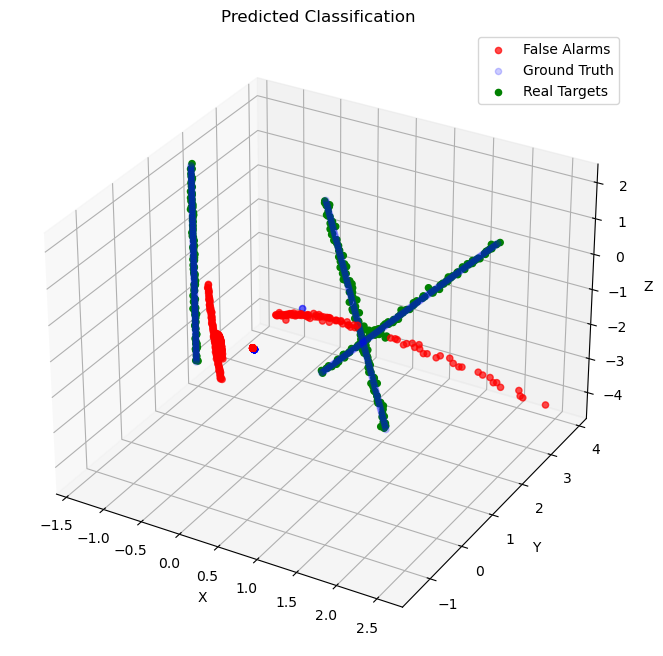

Accuracy: 0.96
Misclassified Points: 11


In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.impute import SimpleImputer as SI
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import warnings
from scipy.spatial import distance

warnings.filterwarnings('ignore')

# Prepare Test Data
test_file = 'T_97copy.csv'
ground_truth_file = 'GT_97.csv'  

try:
    df = pd.read_csv(test_file, header=None, delimiter=',', names=[0, 1, 2])
except pd.errors.ParserError:
    try:
        df = pd.read_csv(test_file, header=None, delimiter='\t', names=[0, 1, 2])
    except pd.errors.ParserError:
        try:
            df = pd.read_csv(test_file, header=None, delimiter=' ', names=[0, 1, 2])
        except pd.errors.ParserError as e:
            print(f"Error reading {test_file}: {e}")
            raise

df = df.to_numpy()
df = pd.to_numeric(df.flatten(), errors='coerce').reshape(df.shape)

if not np.isfinite(df).all():
    df[~np.isfinite(df)] = np.nan
    imp = SI(strategy='mean')
    df = imp.fit_transform(df)

# Load the saved scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Normalize test data
df = scaler.transform(df)
df = df.reshape((df.shape[0], 1, df.shape[1]))

# Load the trained model 
model_file = 'rnn_model'
model = tf.keras.models.load_model(model_file)

# Classify test data
y_pred = model.predict(df)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Read the ground truth file
try:
    gt_df = pd.read_csv(ground_truth_file, header=None, delimiter=',', names=[0, 1, 2])
except pd.errors.ParserError:
    try:
        gt_df = pd.read_csv(ground_truth_file, header=None, delimiter='\t', names=[0, 1, 2])
    except pd.errors.ParserError:
        try:
            gt_df = pd.read_csv(ground_truth_file, header=None, delimiter=' ', names=[0, 1, 2])
        except pd.errors.ParserError as e:
            print(f"Error reading {ground_truth_file}: {e}")
            raise

gt_df = gt_df.to_numpy()
gt_df = pd.to_numeric(gt_df.flatten(), errors='coerce').reshape(gt_df.shape)

if not np.isfinite(gt_df).all():
    gt_df[~np.isfinite(gt_df)] = np.nan
    gt_df = imp.fit_transform(gt_df)

# Normalize ground truth data 
gt_df = scaler.transform(gt_df)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

real_t = df[y_pred == 1]
false_a = df[y_pred == 0]

ax.scatter(false_a[:, 0, 0], false_a[:, 0, 1], false_a[:, 0, 2], c='red', label='False Alarms', alpha=0.7, zorder=1)
ax.scatter(gt_df[:, 0], gt_df[:, 1], gt_df[:, 2], c='blue', label='Ground Truth', alpha=0.2, zorder=2)
ax.scatter(real_t[:, 0, 0], real_t[:, 0, 1], real_t[:, 0, 2], c='green', label='Real Targets', alpha=1, zorder=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Predicted Classification')
ax.legend()
plt.show()

# Calculate accuracy
threshold = 0.1  
correctly_classified = 0

for point in real_t:
    dists = distance.cdist([point[0]], gt_df, 'euclidean')
    if np.any(dists <= threshold):
        correctly_classified += 1

total_rt = len(real_t)
misclassified_points = total_rt - correctly_classified

accuracy = correctly_classified / total_rt if total_rt > 0 else 0
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassified Points: {misclassified_points}")


23/23 [==============================] - 0s 2ms/step


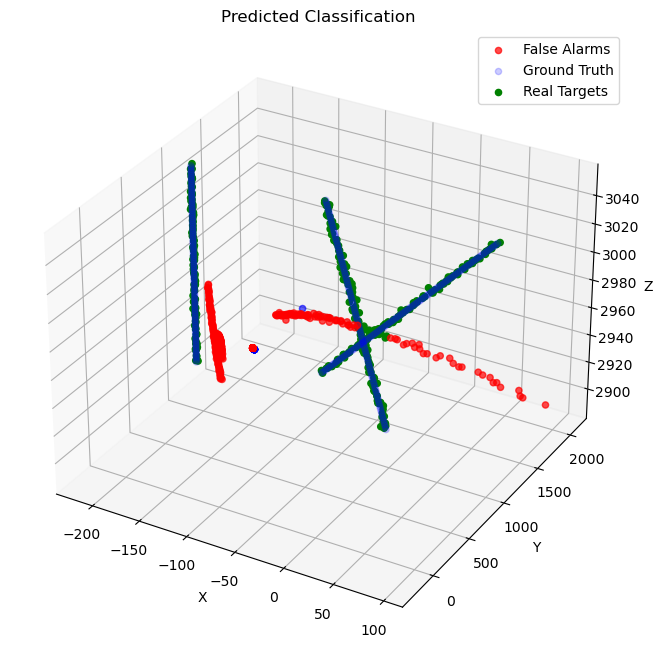

Accuracy: 0.96
Misclassified Points: 13


In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.impute import SimpleImputer as SI
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import warnings
from scipy.spatial import distance

warnings.filterwarnings('ignore')

# Step 4: Prepare and Classify Test Data
test_file = 'T_97copy.csv'
ground_truth_file = 'GT_97.csv'  # Add the ground truth file

# Try reading the test file with different delimiters
try:
    df = pd.read_csv(test_file, header=None, delimiter=',', names=[0, 1, 2])
except pd.errors.ParserError:
    try:
        df = pd.read_csv(test_file, header=None, delimiter='\t', names=[0, 1, 2])
    except pd.errors.ParserError:
        try:
            df = pd.read_csv(test_file, header=None, delimiter=' ', names=[0, 1, 2])
        except pd.errors.ParserError as e:
            print(f"Error reading {test_file}: {e}")
            raise

df = df.to_numpy()
df = pd.to_numeric(df.flatten(), errors='coerce').reshape(df.shape)

if not np.isfinite(df).all():
    df[~np.isfinite(df)] = np.nan
    imp = SI(strategy='mean')
    df = imp.fit_transform(df)

# Load the saved scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Save unnormalized test data for plotting
unnormalized_df = df.copy()

# Normalize test data
df = scaler.transform(df)

# Reshape test data for RNN
df = df.reshape((df.shape[0], 1, df.shape[1]))

# Load the trained model from TensorFlow SavedModel format
model_file = 'rnn_model'
model = tf.keras.models.load_model(model_file)

# Classify test data
y_pred = model.predict(df)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Read the ground truth file
try:
    gt_df = pd.read_csv(ground_truth_file, header=None, delimiter=',', names=[0, 1, 2])
except pd.errors.ParserError:
    try:
        gt_df = pd.read_csv(ground_truth_file, header=None, delimiter='\t', names=[0, 1, 2])
    except pd.errors.ParserError:
        try:
            gt_df = pd.read_csv(ground_truth_file, header=None, delimiter=' ', names=[0, 1, 2])
        except pd.errors.ParserError as e:
            print(f"Error reading {ground_truth_file}: {e}")
            raise

gt_df = gt_df.to_numpy()
gt_df = pd.to_numeric(gt_df.flatten(), errors='coerce').reshape(gt_df.shape)

if not np.isfinite(gt_df).all():
    gt_df[~np.isfinite(gt_df)] = np.nan
    gt_df = imp.fit_transform(gt_df)

# Save unnormalized ground truth data for plotting
unnormalized_gt_df = gt_df.copy()

# Normalize ground truth data using the same scaler
gt_df = scaler.transform(gt_df)

# Visualize predictions with unnormalized data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

real_t = unnormalized_df[y_pred == 1]
false_a = unnormalized_df[y_pred == 0]

# Plot false alarms first
ax.scatter(false_a[:, 0], false_a[:, 1], false_a[:, 2], c='red', label='False Alarms', alpha=0.7, zorder=1)
# Plot ground truth second
ax.scatter(unnormalized_gt_df[:, 0], unnormalized_gt_df[:, 1], unnormalized_gt_df[:, 2], c='blue', label='Ground Truth', alpha=0.2, zorder=2)
# Plot real targets last
ax.scatter(real_t[:, 0], real_t[:, 1], real_t[:, 2], c='green', label='Real Targets', alpha=1, zorder=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Predicted Classification')
ax.legend()
plt.show()

# Calculate accuracy
threshold = 10 
correctly_classified = 0

for point in real_t:
    dists = distance.cdist([point], unnormalized_gt_df, 'euclidean')
    if np.any(dists <= threshold):
        correctly_classified += 1

total_rt = len(real_t)
misclassified_points = total_rt - correctly_classified

accuracy = correctly_classified / total_rt if total_rt > 0 else 0
print(f"Accuracy: {accuracy:.2f}")
print(f"Misclassified Points: {misclassified_points}")
